# Answers

## 0. Some setup

### Import numpy for numerics and pyplot for visualisation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Define some useful constants

In [2]:
echarge = 1.60217662e-19  # electron charge
emass = 9.10938356e-31    # electron mass
vperm = 1.25663706212e-6  # vacumm permittivity

## 1. Defining some vector products

### Define some vectors for testing

In [3]:
v1 = np.array([1.0, 2.0, 3.0])
v2 = np.array([4.0 ,5.0, 6.0])
v3 = np.array([7.0 ,8.0, 9.0])

### 1.a. Dot product

In [4]:
def dot(v1, v2):
    return (v1[0]*v2[0]) + (v1[1]*v2[1]) + (v1[2]*v2[2]) 

### 1.b. Testing the dot product

In [5]:
check1 = 'Passed' if (dot(v1, v2) == 32.0) else 'Failed'
print(f'Check 1: {check1}')
check2 = 'Passed' if (dot(v1, v3) == 50.0) else 'Failed'
print(f'Check 2: {check2}')
check3 = 'Passed' if (dot(v2, v3) == 122.0) else 'Failed'
print(f'Check 3: {check3}')

Check 1: Passed
Check 2: Passed
Check 3: Passed


### 1.c. Cross product

In [6]:
def cross(v1, v2):
    x = (v1[1]*v2[2]) - (v1[2]*v2[1])
    y = (v1[2]*v2[0]) - (v1[0]*v2[2])
    z = (v1[0]*v2[1]) - (v1[1]*v2[0])
    return np.array([x, y, z])

### 1.d. Testing the cross product

In [7]:
check1 = 'Passed' if (cross(v1, v2) == np.array([-3, 6, -3])).all() else 'Failed'
print(f'Check 1: {check1}')
check2 = 'Passed' if (cross(v1, v3) == np.array([-6, 12, -6])).all() else 'Failed'
print(f'Check 2: {check2}')
check3 = 'Passed' if (cross(v2, v3) == np.array([-3, 6, -3])).all() else 'Failed'
print(f'Check 3: {check3}')

Check 1: Passed
Check 2: Passed
Check 3: Passed


## 2. Visualising some magnetic fields

### 2.a. Defining some field functions

In [8]:
def Bfield_constant(pos, t):
    return np.array([0.0, 0.0, 1.0])

def Bfield_spacevarying(pos, t):
    return np.array([0.0, 0.0, 1/np.sqrt(dot(pos, pos))])

def Bfield_timevarying(pos, t):
    return np.array([0.0, 0.0, np.cos(t*(2*np.pi))])

### 2.b. Defining a function to generate a grid of points parrallel to yz-plane

In [9]:
def gen_grid(x, y0, z0, ymax, zmax, dyz):
    num_ys = round((ymax-y0)/dyz)
    ymax = y0 + num_ys*dyz  # adjust ymax if (ymax - ymin) incompatible with dyz
    num_zs = round((zmax-z0)/dyz)
    zmax = z0 + num_zs*dyz  # adjust ymax if (zmax - zmin) incompatible with dyz
    points = []
    for i in range(num_ys):
        for j in range(num_zs):
            points.append(np.array([x,
                                    y0 + (dyz/2.0) + (i*dyz), 
                                    z0 + (dyz/2.0) + (j*dyz)]))
            
    return points

#### Making a few plots to test gen_grid

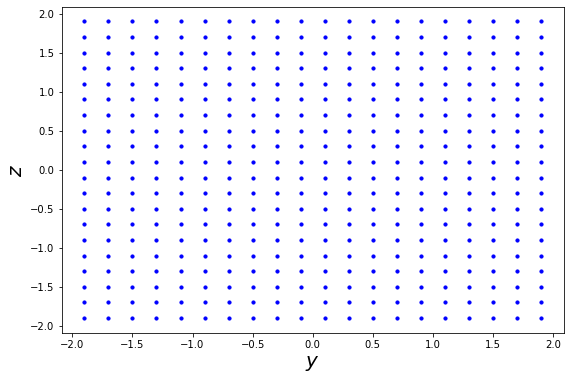

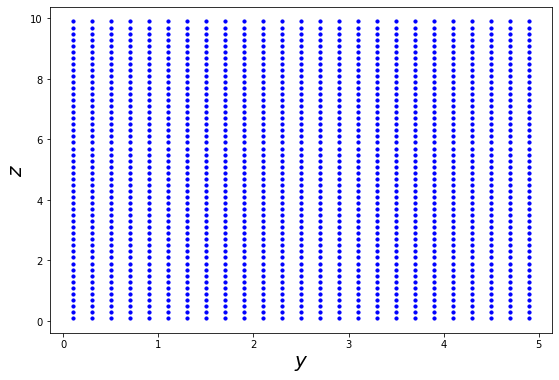

In [10]:
def plot_grid(xyz):
    x, y, z = zip(*tuple(xyz))
    plt.figure(figsize=(9,6))
    plt.scatter(y, z, s=10, c='b') # s for size, c for color
    plt.xlabel(r'$y$', fontsize=20)
    plt.ylabel(r'$z$', fontsize=20)
    plt.show()
    
grid = gen_grid(0, -2, -2, 2, 2, 0.2)
plot_grid(grid)
grid = gen_grid(0, 0, 0, 5, 10, 0.2)
plot_grid(grid)

### 2.c. Visualizing the magnetic fields

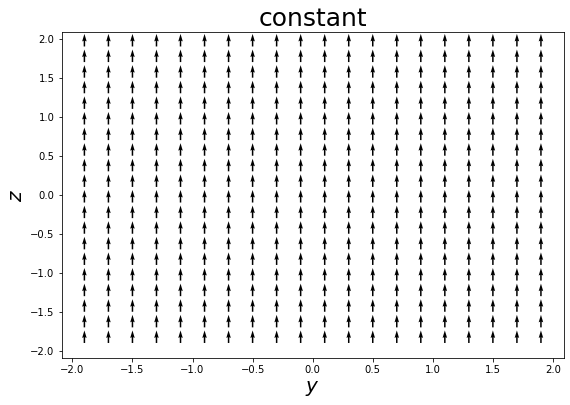

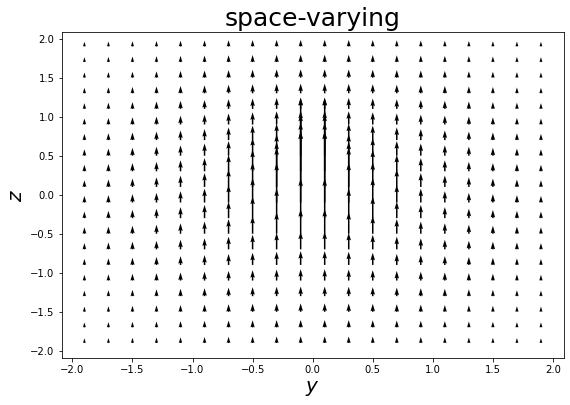

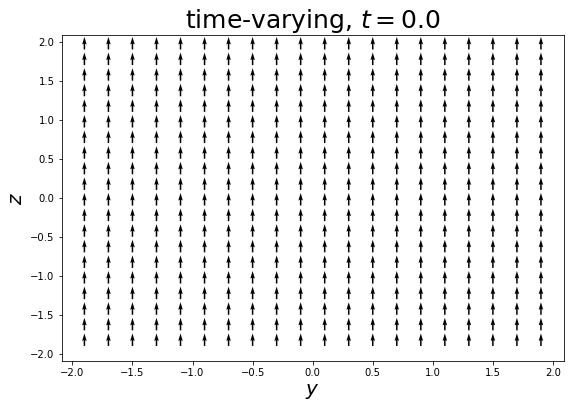

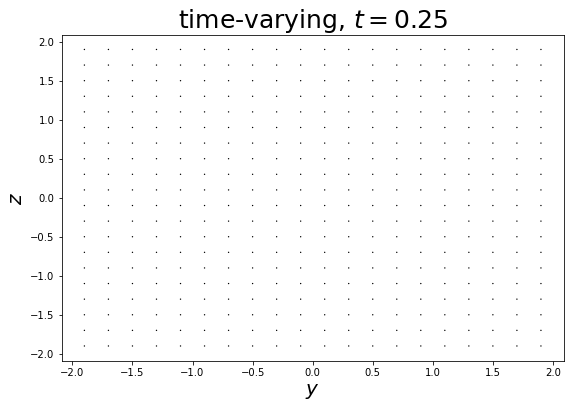

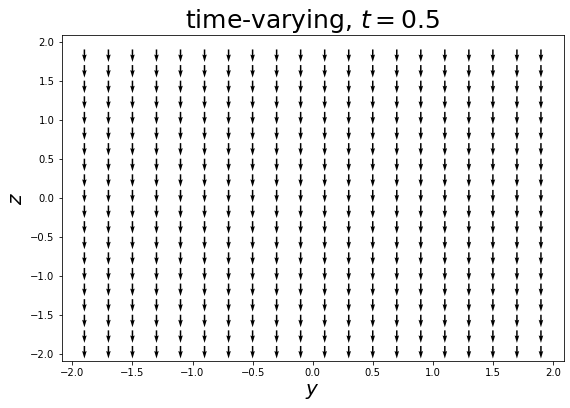

In [11]:
def plot_Bfield(Bfield_function, xyz, t, title=None):
    x, y, z = zip(*tuple(xyz))
    Bvecs = [Bfield_function(pos, t) for pos in xyz]
    Bx, By, Bz = zip(*tuple(Bvecs))
    plt.figure(figsize=(9,6))
    plt.quiver(y, z, By, Bz, scale=40.0)
    plt.xlabel(r'$y$', fontsize=20)
    plt.ylabel(r'$z$', fontsize=20)
    if not title is None:
        plt.title(title, fontsize=25)
    plt.show()
    
grid = gen_grid(0, -2, -2, 2, 2, 0.2)
plot_Bfield(Bfield_constant, grid, 0, 'constant')
plot_Bfield(Bfield_spacevarying, grid, 0, 'space-varying')
plot_Bfield(Bfield_timevarying, grid, 0.0, 'time-varying, $t=0.0$')
plot_Bfield(Bfield_timevarying, grid, 0.25, 'time-varying, $t=0.25$')
plot_Bfield(Bfield_timevarying, grid, 0.5, 'time-varying, $t=0.5$')

## 3. Writing and testing the integrator for the vector differential equation

### 3.a. Writing the integrator

In [12]:
def euler(vec_init, t_init, t_final, dt, diff_func, *args, **kwargs):
    del_t = t_final - t_init # total duration to solve for
    n_dt = round(del_t/dt)
    dt = del_t/n_dt # adjust dt if (t_final - t_init) incompatible with dt
    
    t = t_init
    vec = vec_init
    
    ts, vecs = [t], [vec] # initialise the output lists with the initial values as first element
    for i in range(n_dt):
        dvec = diff_func(vec, t, *args, **kwargs) # get the change in the vector at this step
        vec = (vec + (dvec*dt)) # update vec according to the change calculated above
        t += dt
        
        ts.append(t)
        vecs.append(vec) # add the new values to the output lists
        
    return ts, vecs

### 3.b. Testing with 1st order differential equation

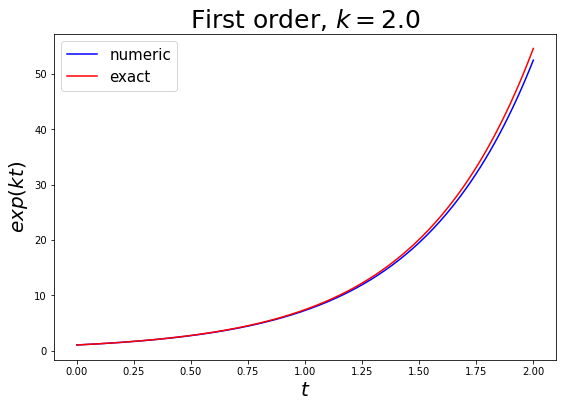

In [13]:
def diff_func(vec, t, const):  # simple first order case
    return const*vec

const = 2.0
t_init = 0.0
t_final = 2.0
dt = 0.01
vec_init = np.array([1.0])  # boundary condition - the function takes value 1.0 at t_init

ts, vecs = euler(vec_init, t_init, t_final, dt, diff_func, const=const)

y, = zip(*tuple(vecs)) # restructure output for plotting

### plotting ###
plt.figure(figsize=(9,6))
plt.plot(ts, y, c='b', label='numeric')
plt.plot(ts, np.exp(const*np.array(ts)), c='r', label='exact')
plt.xlabel('$t$', fontsize=20)
plt.ylabel('$exp(kt)$', fontsize=20)
plt.title('First order, $k=2.0$', fontsize=25)
plt.legend(loc='best', fontsize=15)
plt.show()

### 3.c. Testing with 2nd order differential equation

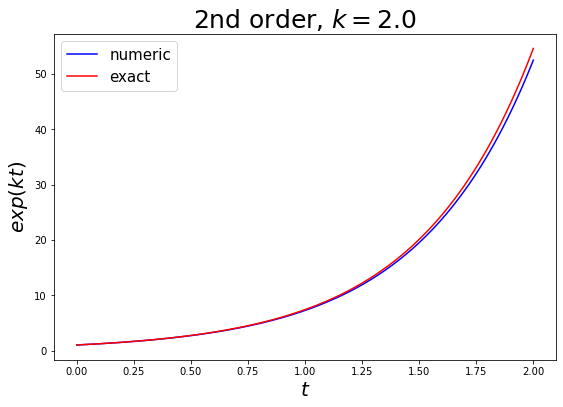

In [14]:
def diff_func(vec, t, const):  # 2nd order case
    vec_length = len(vec)
    return np.concatenate((vec[vec_length//2:], (const**2)*vec[:vec_length//2])) # put function value and 1st derivative together in a single vector

const = 2.0
t_init = 0.0
t_final = 2.0
dt = 0.01
vec_init = np.array([1.0, const])  # boundary condition - the function and 1st derivative take values 1.0 and k at t_init respectively

ts, vecs = euler(vec_init, t_init, t_final, dt, diff_func, const=const)

y, dy = zip(*tuple(vecs)) # restructure output for plotting

### plotting ###
plt.figure(figsize=(9,6))
plt.plot(ts, y, c='b', label='numeric')
plt.plot(ts, np.exp(const*np.array(ts)), c='r', label='exact')
plt.xlabel('$t$', fontsize=20)
plt.ylabel('$exp(kt)$', fontsize=20)
plt.title('2nd order, $k=2.0$', fontsize=25)
plt.legend(loc='best', fontsize=15)
plt.show()

## 4. Simulate a charged test particle moving in a magnetic field

#### Representing the particle

In [15]:
def get_particle():
    return {'charge' : echarge,
            'mass' : emass,
            'pos' : np.array([0.0, 0.0, 0.0]),
            'vel' : np.array([1.0e11, 0.0, 0.0])}

### 4.a. Writing the differential equation

In [16]:
def diff_func(vec, t, mass, charge, Bfield_function):
    vec_length = len(vec)
    pos = vec[:vec_length//2]
    vel = vec[vec_length//2:]
    dpos = vel
    dvel = (charge/mass)*cross(vel, Bfield_function(pos, t))
    return np.concatenate((dpos, dvel))

### 4.b. and 4.c. Performing some simulations

#### Define a simulation function

In [17]:
def simulation(Bfield_function, particle, T, dt, integrator, diff_func):
    vec = np.concatenate((particle['pos'], particle['vel']))
    ts, vecs = integrator(vec, 0, T, dt, diff_func, 
                          charge=particle['charge'], 
                          mass=particle['mass'], 
                          Bfield_function=Bfield_function)
    
    pos_xs, pos_ys, pos_zs, vel_xs, vel_ys, vel_zs = zip(*tuple(vecs))
    poss = [np.array(triple) for triple in zip(*(pos_xs, pos_ys, pos_zs))] # restructure integrator output in convenient way
    vels = [np.array(triple) for triple in zip(*(vel_xs, vel_ys, vel_zs))]
    
    particle['pos'] = poss[-1].copy() # update position of particle using final timestep
    particle['vel'] = vels[-1].copy() # update velocity of particle using final timestep
    
    results = {'t':ts, 'pos':poss, 'vel':vels} # package the results up in a nice dict
    return results

#### Make a 2nd particle with opposite charge but otherwise identical

In [18]:
def get_particle2():
    return {'charge' : -echarge,
            'mass' : emass,
            'pos' : np.array([0.0, 0.0, 0.0]),
            'vel' : np.array([1.0e11, 0.0, 0.0])}

#### Run the simulations with the 2 particles

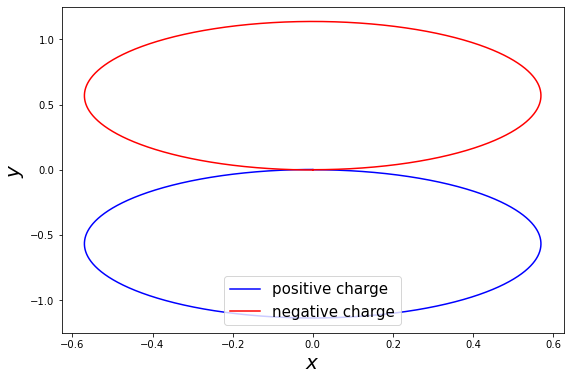

In [19]:
t_unit = emass/(1.0*echarge)
dt = 0.001*t_unit
T = (2.0*np.pi)*t_unit

particle = get_particle()
results = simulation(Bfield_constant, particle, T, dt, euler, diff_func)

pos_x, pos_y, pos_z = zip(*tuple(results['pos'])) # restructure positions for plotting

particle2 = get_particle2()
results2 = simulation(Bfield_constant, particle2, T, dt, euler, diff_func)

pos2_x, pos2_y, pos2_z = zip(*tuple(results2['pos'])) # restructure positions for plotting

### plotting ###
plt.figure(figsize=(9,6))
plt.plot(pos_x, pos_y, c='b', label='positive charge')
plt.plot(pos2_x, pos2_y, c='r', label='negative charge')
plt.xlabel('$x$', fontsize=20)
plt.ylabel('$y$', fontsize=20)
plt.legend(loc='best', fontsize=15)
plt.show()

## 5. Visualising the magnetic field induced by a moving charge

### 5.a. Writing the induced field function

#### Function with particle as an argument

In [20]:
def induced_Bfield(pos, t, particle):
    disp = pos - particle['pos'] # displacement vector from particle to position we're looking at
    return (vperm*particle['charge']/(4*np.pi)) * cross(particle['vel'], disp)/dot(disp, disp)

#### Create a moving particle moving quickly along x axis

In [21]:
def get_xmoving_particle():
    return {'charge' : echarge,
            'mass' : emass,
            'pos' : np.array([0.1, 0.1, 0.1]),
            'vel' : np.array([1.0e26, 0.0, 0.0,])}

#### Get the field function in its usual form

In [22]:
xmoving_particle = get_xmoving_particle()
def Bfield_particle(pos, t):
    return induced_Bfield(pos, t, xmoving_particle)

### 5.b. Visualise the induced field

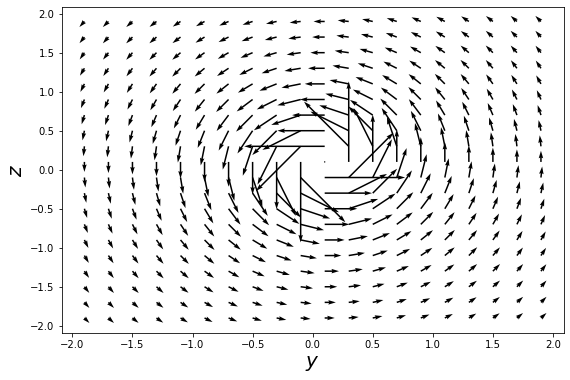

In [23]:
grid = gen_grid(0, -2, -2, 2, 2, 0.2)
plot_Bfield(Bfield_particle, grid, 0)

## 6. Gauss's law for magnetism

### 6.a. and 6.b. Creating the cubic surface and area element vectors

#### Defining a function to create 'oriented' surfaces

In [24]:
def gen_oriented_grid(axis, orientation, coord1, coord2_0, coord3_0, coord2_max, coord3_max, dcoord):
    grid = gen_grid(coord1, coord2_0, coord3_0, coord2_max, coord3_max, dcoord) # get a grid perpendicular to z axis
    axis_i = {'x':0, 'y':1, 'z':2}[axis.lower()]
    grid = [ point[[axis_i, (axis_i+1)%3, (axis_i+2)%3]] for point in grid ] # swap co-ords to make the grid perpendicular to chosen axis
    
    dA_mag = dcoord**2 # get magnitude of area element
    
    dA = np.array([0.0, 0.0, 0.0])
    dA[axis_i] = np.sign(orientation)*dA_mag # get vector form of area element 

    return grid, dA

#### Define a function to calculate magnetic flux through a regular grid surface

In [25]:
def calculate_flux(Bfield_function, t, surface_points, surface_dA):
    flux = 0.0
    for point in surface_points:
        flux += dot(Bfield_function(point, t), surface_dA)
    return flux

#### Create a cube centred at the origin

In [26]:
xpos, dA_xpos = gen_oriented_grid('x', 1.0, 0.5, -0.5, -0.5, 0.5, 0.5, 0.001) # create the face on +ve x-axis
xneg, dA_xneg = gen_oriented_grid('x', -1.0, -0.5, -0.5, -0.5, 0.5, 0.5, 0.001) # create the face on -ve x-axis

ypos, dA_ypos = gen_oriented_grid('y', 1.0, 0.5, -0.5, -0.5, 0.5, 0.5, 0.001) # create the face on +ve y-axis
yneg, dA_yneg = gen_oriented_grid('y', -1.0, -0.5, -0.5, -0.5, 0.5, 0.5, 0.001) # create the face on -ve y-axis

zpos, dA_zpos = gen_oriented_grid('z', 1.0, 0.5, -0.5, -0.5, 0.5, 0.5, 0.001) # create the face on +ve z-axis
zneg, dA_zneg = gen_oriented_grid('z', -1.0, -0.5, -0.5, -0.5, 0.5, 0.5, 0.001) # create the face on -ve z-axis

### 6.c Calculating fluxes through the cube faces

In [27]:
flux_xpos = calculate_flux(Bfield_particle, 0.0, xpos, dA_xpos)
flux_xneg = calculate_flux(Bfield_particle, 0.0, xneg, dA_xneg)

flux_ypos = calculate_flux(Bfield_particle, 0.0, ypos, dA_ypos)
flux_yneg = calculate_flux(Bfield_particle, 0.0, yneg, dA_yneg)

flux_zpos = calculate_flux(Bfield_particle, 0.0, zpos, dA_zpos)
flux_zneg = calculate_flux(Bfield_particle, 0.0, zneg, dA_zneg)

#### Printing the results

In [28]:
print(f'The flux through the +ve x face is: {flux_xpos}')
print(f'The flux through the -ve x face is: {flux_xneg}')
flux_x = flux_xpos + flux_xneg
print(f'The total flux through the x faces is: {flux_x}')

print(f'The flux through the +ve y face is: {flux_ypos}')
print(f'The flux through the -ve y face is: {flux_yneg}')
flux_y = flux_ypos + flux_yneg
print(f'The total flux through the y faces is: {flux_y}')

print(f'The flux through the +ve z face is: {flux_zpos}')
print(f'The flux through the -ve z face is: {flux_zneg}')
flux_z = flux_zpos + flux_zneg
print(f'The total flux through the x faces is: {flux_z}')

flux = flux_x + flux_y + flux_z
print(f'The total flux through the cube surface is: {flux}')

The flux through the +ve x face is: 0.0
The flux through the -ve x face is: 0.0
The total flux through the x faces is: 0.0
The flux through the +ve y face is: -2.1294852298939033
The flux through the -ve y face is: -1.85747510863246
The total flux through the y faces is: -3.9869603385263632
The flux through the +ve z face is: 2.1294852298939033
The flux through the -ve z face is: 1.85747510863246
The total flux through the x faces is: 3.9869603385263632
The total flux through the cube surface is: 0.0
